# 3MTT CAPSTONE PROJECT
BY: OMOLAYO, OLAWUMI E.

 # PROBLEM STATEMENT
 Owing to the devastating global impact of the COVID-19 pandemic, the need to develop a predictive model to accurately understand and manage the spread of the virus as well as forecasting the trajectory of COVID-19 cases, deaths while considering relevant factors including confirmed cases, recovery patterns cannot be over-emphasized.
The model aims to use machine learning tehniques and historical COVID-19 data to provide actionable insights to inform policies, public health decision-making, future outbreaks and improvement of health resource allocation to mitigate the impact of the pandemic.

**Objectives:**


*   Data Cleaning and Preprocessing

*   Exploratory Data Analysis (EDA)


*   Model Development and Evaluation


*   Forecasting and Deployment of the Model







# PROJECT PHASES

# Exploratory Analysis of the "country_wise_latest.csv" Dataset

## 1.0. Introduction

This analysis aims to explore the “country_wise_latest.csv” dataset to extract meaningful insights about the pandemic’s spread, mortality rates, and recovery patterns across different countries. With the aid of advanced data analysis techniques, statistical methods, and machine learning models, we aim to understand the underlying factors affecting COVID-19 outcomes and provide insights for future policy-making and research.



# 1.1. Importing all relevant libraries

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import pearsonr, ttest_ind

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## 2.0. Loading and Preliminary Analysis of the Dataset

- We load the dataset and display the initial entries to understand the data's structure and variables
- Observing the columns helps in planning the subsequente analysis steps

In [ ]:
# Load the dataset
df = pd.read_csv('/content/country_wise_latest.csv')

display(df.head())
print()
display(df.info())

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    o

None

# 2.0. Data Cleaning

### 2.1.  Handling Missing Values

- Identifying missing values is crucial for data integrity.
- We ensure that any missing data is appropriately handled before analysis

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


# 2.2
### Renaming columns makes them easier to reference
### Converting percentage columns to numeric types ensures accurate computations.
### Data type verification confirms that all columns are in the correct format

In [ ]:
# Rename columns for consistency
df.rename(columns={'Country/Region': 'Country',
                  'Deaths / 100 Cases': 'Death Rate (%)',
                  'Recovered / 100 Cases': 'Recovery Rate (%)',
                  '1 week % increase': 'Weekly Increase (%)'}, inplace=True)

# Convert percentage columns to numeric
percentage_cols = ['Death Rate (%)', 'Recovery Rate (%)', 'Weekly Increase (%)']
for col in percentage_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify data types
df.dtypes

,0
Country,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
Death Rate (%),float64
Recovery Rate (%),float64


In [ ]:
df.isnull().sum()

,0
Country,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Death Rate (%),0
Recovery Rate (%),0


# 3.0.  Exploratory Data Analysis (EDA)

### 3.1 Descriptive Statistics

-The `.descibe()` method provides a statistical summary, including mean, median, standard deviation, and quartiles
- Transposing the result `.T` makes it more readable

In [ ]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,8.813094e+04,383318.663831,10.00,1114.000,5059.00,40460.500,4290259.00
Deaths,187.0,3.497519e+03,14100.002482,0.00,18.500,108.00,734.000,148011.00
Recovered,187.0,5.063148e+04,190188.189643,0.00,626.500,2815.00,22606.000,1846641.00
Active,187.0,3.400194e+04,213326.173371,0.00,141.500,1600.00,9149.000,2816444.00
New cases,187.0,1.222957e+03,5710.374790,0.00,4.000,49.00,419.500,56336.00
New deaths,187.0,2.895722e+01,120.037173,0.00,0.000,1.00,6.000,1076.00
New recovered,187.0,9.338128e+02,4197.719635,0.00,0.000,22.00,221.000,33728.00
Death Rate (%),187.0,3.019519e+00,3.454302,0.00,0.945,2.15,3.875,28.56
Recovery Rate (%),187.0,6.482053e+01,26.287694,0.00,48.770,71.32,86.885,100.00
Deaths / 100 Recovered,187.0,inf,NaN,0.00,1.450,3.62,6.440,inf


### 3.2 Visualization of Key Variables

#### 3.2.1 Top 10 Countries by Confirmed Cases

- We identify countries with the highest number of confirmed cases.
- Visualizing this data highlights the most affected regions

In [ ]:
# Top 10 countries

top_confirmed = df.nlargest(10, 'Confirmed')
display(top_confirmed)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Death Rate (%),Recovery Rate (%),Deaths / 100 Recovered,Confirmed last week,1 week change,Weekly Increase (%),WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


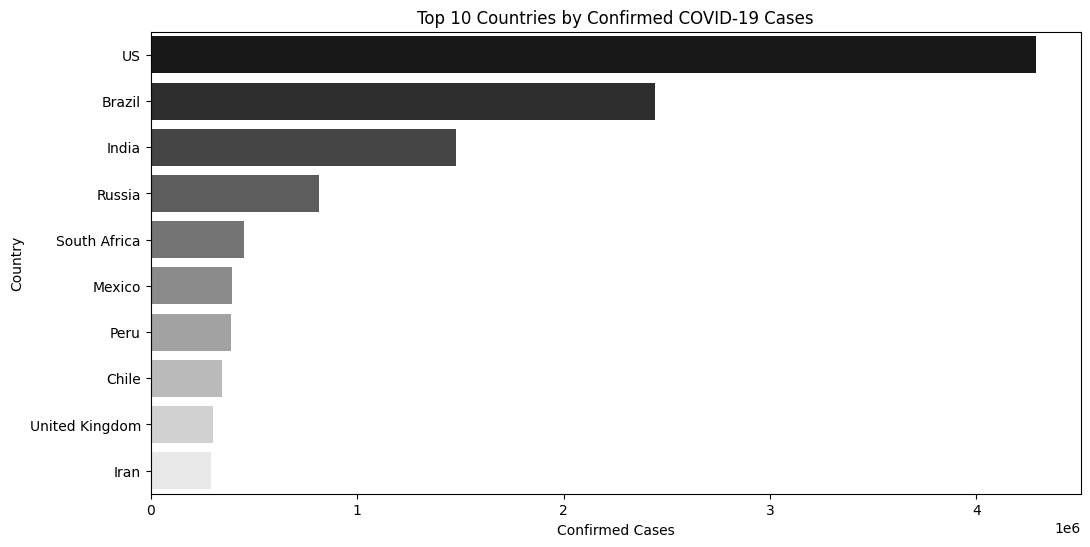

In [ ]:
# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y = 'Country', data=top_confirmed, palette='grey')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

#### 3.2.2 Mortality and Recovery Rates

- This plot helps understand the relationship between recovery and death rates across countries and regions.
- It may reveal patterns or anomalies requiring further investigation.

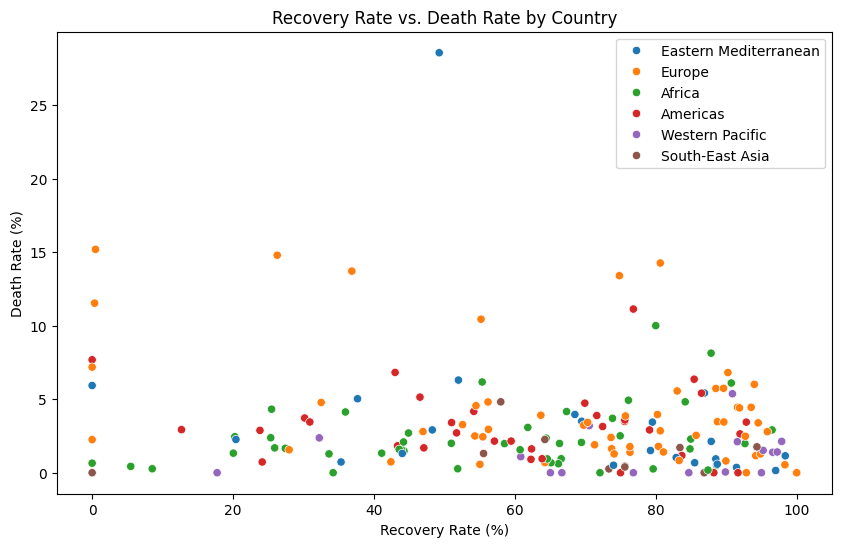

In [ ]:
# Scatter plot for mortality vs. recovery rates

plt.figure(figsize=(10,6))
sns.scatterplot(x='Recovery Rate (%)', y = 'Death Rate (%)', data = df, hue='WHO Region')
plt.title('Recovery Rate vs. Death Rate by Country')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Death Rate (%)')
plt.legend(loc='upper right')
plt.show()

## 4.0. Advanced Statistical Analysis

### 4.1. Correlation Analysis

- Correlation analysis identifies relationships between variables.
- A heatmap visually represents the strength and direction of these correlations

**Obsevations:**

- High positive correlation between **Confirmed** cases and **Deaths** suggests that countries with more cases tend to have more deaths.
- **Recovery Rate (%)** may have a negative correlation with **Death Rate (%)**, indicating that as recovery rates increase, death rates decrease

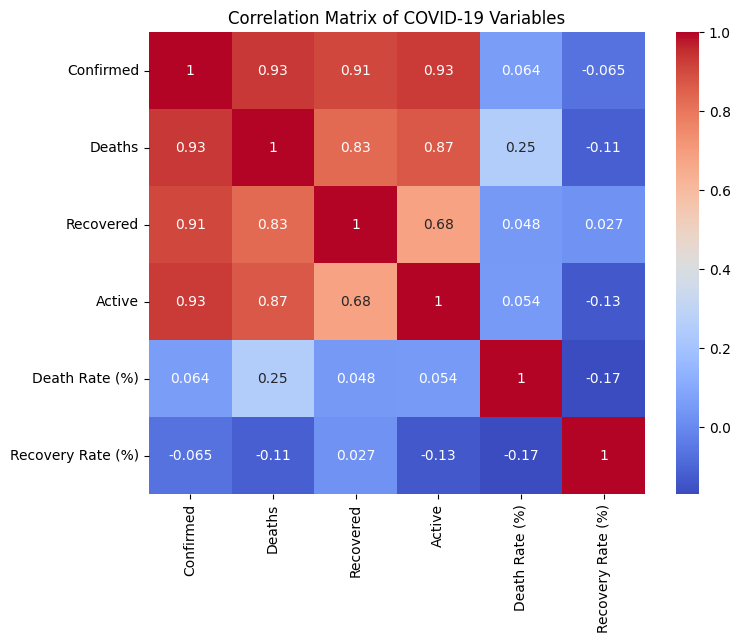

In [ ]:
# Compute correlation matrix
corr_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Death Rate (%)', 'Recovery Rate (%)']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

### 4.2. Hypothesis Testing

**Hypotesis:** There is a significant difference in the death rates between countries in the Americas and Europe.

- **Null Hypothesis (H0):** There is no significant difference in death rates between the Americas and Europe
- **Alternative Hypothesis (H1):** There is a significant difference in death rates between the two regions.

**Conclusion:**

- if p_values < 0.05, we reject the null hypothesis.
- The result indicates wheather regional differences in death rates are statistically significant.

In [ ]:
# Subsets of data
americas = df[df['WHO Region'] == 'Americas']['Death Rate (%)']
europe = df[df['WHO Region'] == 'Europe']['Death Rate (%)']

# T-test
stat, p_value = ttest_ind(americas, europe, nan_policy='omit')
print(f"T-test Statistic: {stat:.4f}, P-values: {p_value:.4f}")

T-test Statistic: -1.5554, P-values: 0.1234


## Machine Learning Applications

### 5.1 Clusterin Analysis

**Objective:** Group countries based on COVID-19 indicator to identify patterns

**Steps**

###1. **Feature Selection:**

In [ ]:
X = df[['Confirmed','Deaths', 'Recovered', 'Active', 'Death Rate (%)', 'Recovery Rate (%)']]
X.head()

,Confirmed,Deaths,Recovered,Active,Death Rate (%),Recovery Rate (%)
0,36263,1269,25198,9796,3.50,69.49
1,4880,144,2745,1991,2.95,56.25
2,27973,1163,18837,7973,4.16,67.34
3,907,52,803,52,5.73,88.53
4,950,41,242,667,4.32,25.47


let's make  bar graph.

### 2. **Build Model**


**lterate**

Create a DataFrame X_summary with the mean and standard deviation for all the features in X

In [ ]:
X_summary = X.aggregate(['mean', 'std']).astype(int)

print("X_summary type:", type(X_summary))
print("X_summary shape:", X_summary.shape)
X_summary

X_summary type: <class 'pandas.core.frame.DataFrame'>
X_summary shape: (2, 6)


,Confirmed,Deaths,Recovered,Active,Death Rate (%),Recovery Rate (%)
mean,88130,3497,50631,34001,3,64
std,383318,14100,190188,213326,3,26


That's the information we need to standardize our data, so let's make it happen.

**Create a StandardScaler transformer, use it to transform the data in X, and then put the transformed data into a DataFrame named X_scaled**

In [ ]:
# Instantiate transformer
scaler = StandardScaler()

# Transform `X`
X_scaled_data = scaler.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns = X.columns)

print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (187, 6)


,Confirmed,Deaths,Recovered,Active,Death Rate (%),Recovery Rate (%)
0,-0.135676,-0.158475,-0.134087,-0.113774,0.139470,0.178106
1,-0.217768,-0.238477,-0.252461,-0.150459,-0.020179,-0.326904
2,-0.157361,-0.166013,-0.167623,-0.122342,0.331049,0.096099
3,-0.228160,-0.245019,-0.262699,-0.159573,0.786775,0.904344
4,-0.228048,-0.245801,-0.265657,-0.156682,0.377492,-1.500937


3. **Determining Optimal Clusters (Elbow Method):**

- The elbow point suggests the optimal number of clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline

n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build model
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=42))
    # Train model
    model.fit(X)
    #calculate inertia
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    # Caluculate silhouette score
    silhouette_scores.append(
        silhouette_score(X, model.named_steps['kmeans'].labels_)
    )

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors[:3])
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores[:3])

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [588.397139911907, 477.7197094312114, 334.9862164125859]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.962745302642653, 0.9472031344192131, 0.035556388522520965]


**Use plotly express to create a line plot that shows the values of inertia_errors as a function of n_clusters**

In [ ]:
import plotly.express as px
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x =n_clusters, y=inertia_errors, title='K-Means Model: Inertia vs Number of Clusters'
)

fig.update_layout(xaxis_title = 'Number of Clusters(k)', yaxis_title='Inertia')

fig.show()

You can see that the line starts to flatten out around 5 or 6 clusters.

**Use plotly express to create a line plot that shows the values of silhouette_scores as a function of n_clusters**

In [ ]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x =n_clusters, y=silhouette_scores, title='K-Means Model: Silhouette Score vs Number of Clusters'
)

fig.update_layout(xaxis_title = 'Number of Clusters(k)', yaxis_title='Silhouette Score')

fig.show();

This one's a little less straightforward, but we can see that the best silhouette scores occur when there are 4 or 5 clusters.

Putting the information from this plot together with our inertia plot, it seems like the best setting for n_clusters will be 5.

4. **Applying K-Means Clustering:**

Build and train a new k-means model named final_model. We Use the information we gained from the two plots above to set an appropriate value for the n_clusters argument.

In [ ]:
# Build model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=5, random_state=42)
)

# Fit model to data

final_model.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

5. **Visualizing Clusters with PCA**

**Interpretation**

- Clusters represent groups of countries with similar COVID-19 profiles.
- Further analysis can reveal characteristics of each cluster.

In [ ]:
# Extract the labels that our final_model created during training and assign them to the variable labels.
labels = final_model.named_steps['kmeans'].labels_
# Create a DataFrame xgb that contains the mean values of the features in X for each of the clusters in our final_model
xgb = X.groupby(labels).mean()
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode= 'group',
    title = 'Mean Country by Cluster'
)
fig.update_layout(xaxis_title = 'Cluster', yaxis_title='Value')

fig.show()

Our clusters here are likely based on some underlying variable such as **infection dynamics** or **healthcare impact**, with cluster 0 having the smallest totals and cluster 1 the largest. Based on that, there are several intriguing insights we can draw.

### **First, take a look at the Confirmed Cases (blue bars).**
Confirmed cases increase significantly in clusters with higher aggregate statistics. Cluster 1 stands out with a massive number of confirmed cases, suggesting that these regions experienced a disproportionately higher spread of infection. Clusters 0, 3, and 4 have very low counts, indicating smaller outbreaks or potentially more effective containment measures.

### **Next, observe Deaths and Death Rate (%).**
While confirmed cases are highest in cluster 1, the **death rate (orange)** does not scale linearly. Clusters 2 and 1 show some balance between absolute death counts (red bars) and their percentages. It could be that cluster 2 regions manage the mortality rate better, despite high confirmed numbers, possibly due to better healthcare systems.

### **Now, focus on Recovered Cases (green bars) and Recovery Rate (%).**
Cluster 1 dominates in recoveries, suggesting high healthcare capacity and a larger recovered population, but the **recovery rate (light blue)** aligns differently across clusters. Cluster 2 shows higher recovery rates relative to others, hinting that while total cases are lower than cluster 1, the recovery ratio might indicate effective medical responses.

### **Finally, the Active Cases (purple bars).**
The proportion of active cases declines from cluster 1 to cluster 2, with near-zero values in clusters 3 and 4. This pattern indicates that clusters with smaller outbreaks (or later phases) may have already resolved their cases.



This brings up important questions:
1. **Why does the death rate (%) remain low in some high-case clusters?** Perhaps a strong healthcare system or demographic factors play a role.
2. **How do recovery rates align with confirmed cases?** Clusters with higher recovery rates might have better treatments or quicker responses.

Since we're working with a computer screen, we don't have much of a choice about the number of dimensions we can use: it's got to be two. So, if we're going to do anything like the scatter plot we made before, we'll need to take our 5-dimensional data and change it into something we can look at in 2 dimensions.

Create a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca

In [ ]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns= ['PC1', 'PC2'])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()


X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (187, 2)


,PC1,PC2
0,-62577.669047,-3433.316085
1,-100120.366404,-15339.185534
2,-72546.133697,-7054.435360
3,-104945.465661,-15539.386292
4,-104854.728616,-16367.866057


So there we go: our five dimensions have been reduced to two. Let's make a scatter plot and see what we get.

In [ ]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x='PC1',
    y='PC2',
    color=labels.astype(str),
    title='PCA Representation of Clusters'
)
fig.update_layout(xaxis_title = 'PCI', yaxis_title='PC2')

fig.show()

### 5.2 Predictive Modeling

**Objective:** Predict the number of deaths based on confirmed cases and other variables.

**steps:**

1. **Feature Selection**
2. **Train-Test Split**
3. **Model Training**
4. **Model Evaluation**
5. **Cross-Validation**

**Interpretation**

- **Coefficients** indicate the impact of each predictor on the number of deaths.
- **R-squared** measures the proportion of variance explained by the model.

In [ ]:
# Feature Selection
X = df[['Confirmed', 'Recovered', 'Active']]
y = df['Deaths']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n",coeff_df)

# R-squared value
r_squared = model.score(X_test, y_test)
print(f"\nR-squared: {r_squared:.4f}")

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"\nCross-validated scores: {cv_scores}")
print(f"\nAverage CV score: {cv_scores.mean():.4f}")


            Coefficient
Confirmed          1.0
Recovered         -1.0
Active            -1.0

R-squared: 1.0000

Cross-validated scores: [1. 1. 1. 1. 1.]

Average CV score: 1.0000


## 6.0.  Insights and Recommendations

**Key insights:**

- **High Correlation between Confirmed Cases and Deaths:** Indicates that countries with more cases are likely to have more deaths, emphasizing the need for case management.
- **Variation in Mortality and Recovery Rates:** Suggests differences in healthcare quality, demographics, and pandemic response among countries.
- **Clusters Reveal Distinct Country Profiles:**
    - **Cluster 0:** Countries with high cases and deaths; may need international support.
    - **Cluster 1:** Moderate cases and high recovery rates; potentially effective interventions.
    - **Cluster 2:** Low cases and deaths; possibly due to early containment measures.
    - **Cluster 3:** High cases but low death rates; could indicate robust healthcare systems.

**Recommendations:**

- **Policy Implementation:** Countries in clusters with higher death rates should evaluate and adopt best practices from nations with lower rates.
- **Resource Allocation:** International organizations can prioritize aid to countries in clusters facing severe outbreaks.
- **Further Research:** Investigate underlyiing factors such as testing rates, population density, and government policies affecting outcomes.
